## The goal is to compare on a specific dataset and specific problem, an ML solution and a simple if code

### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

### Firstly: Explore data

load it

In [16]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


check and remove null data

In [17]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

quick describe (a lot of binary entries)

In [18]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [19]:
#number of 2 (diabetes)
print(df["Diabetes_012"].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


put the 1 and 2 together as the same value (boolean)

In [20]:
new_df = df.copy()
new_df["Diabetes_012"] = new_df["Diabetes_012"].replace(2, 1)
print(new_df["Diabetes_012"].value_counts())

Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


autocorrelation matrix

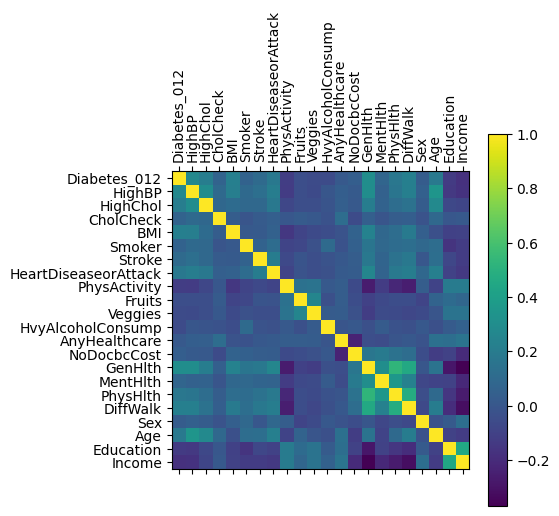

In [21]:
corr_matrix = new_df.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90) 
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)  
plt.colorbar()  
plt.show()

correlation with the output (Diabetes_012)

In [22]:
corr_matrix["Diabetes_012"].sort_values(ascending=False)
#mean value of each column (when diabetes == 1)


Diabetes_012            1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Fruits                 -0.042088
HvyAlcoholConsump      -0.056682
Veggies                -0.059219
PhysActivity           -0.121392
Education              -0.131803
Income                 -0.172794
Name: Diabetes_012, dtype: float64

information about the value when the patient have diabetes

In [23]:
only_diabetes = new_df[new_df["Diabetes_012"] == 1]
only_diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,39977.0,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,...,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000,39977.000000
mean,1.0,0.738350,0.664407,0.992421,31.802737,0.515271,0.088376,0.213673,0.636091,0.587388,...,0.958076,0.108587,3.254446,4.469695,7.768417,0.360357,0.474323,9.344798,4.750031,5.226430
std,0.0,0.439539,0.472203,0.086730,7.328665,0.499773,0.283844,0.409904,0.481129,0.492310,...,0.200418,0.311125,1.017037,8.941793,11.201535,0.480110,0.499346,2.369167,1.062263,2.216756
min,1.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,3.000000
50%,1.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.000000,6.000000
75%,1.0,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,14.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Secondly: Do the Machine Learning version (Neuronal networks)

prepare the data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop("Diabetes_012", axis=1), new_df["Diabetes_012"], test_size=0.2, random_state=42)

# #SMOTE in order to balance the dataset
smote = SMOTE()
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)



In [25]:

#MLPClassifier


# mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)
# mlp.fit(X_train_res, Y_train_res)
# predictions = mlp.predict(X_test)
# mlp.fit(X_train, Y_train)



#decision tree 


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_res, Y_train_res)
# decision_tree.fit(X_train, Y_train)
predictions = decision_tree.predict(X_test)

#kmeans

# kmeans = KMeans(n_clusters=2)
# # kmeans.fit(X_train_res)
# kmeans.fit(X_train)
# predictions = kmeans.predict(X_test)


predictions



array([1., 0., 0., ..., 0., 0., 0.])

add the prediction to the test df (for the comparation)

In [26]:
ai_df = X_test.copy()
ai_df["prediction"] = predictions
ai_df["Diabetes_012"] = Y_test
ai_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,prediction,Diabetes_012
219620,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0,1.0,0.0
132821,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0,0.0,0.0
151862,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0,0.0,0.0
139717,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0,0.0,0.0
239235,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,...,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169513,1.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,3.0,0.0,10.0,0.0,0.0,9.0,6.0,7.0,0.0,1.0
182415,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,2.0,1.0,10.0,0.0,0.0,10.0,5.0,8.0,0.0,0.0
109739,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3.0,3.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0,0.0
181671,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,1.0,13.0,4.0,5.0,0.0,0.0


### Thirdly: The if solution

In [27]:
def calculate_score(row,point):
    score = 0
    if row['HighBP'] == 1:
        score += point
            
    if row['HighChol'] == 1:
        score += point
            
    if row["CholCheck"] == 0: #mean no cholostrol check for 5 years
        score += point
            
    if row["BMI"] >= 30 : #the BMI mean is > when diabetes == 1
        score += point
            
    if row["Smoker"] == 1: #the smoker mean is > when diabetes == 1
        score += point
            
    if row["Stroke"] == 1: #the Stroke mean is > when diabetes == 1 (twice higher)
        score += point
        
    if row["HeartDiseaseorAttack"] == 1: #the HeartDiseaseorAttack mean is > when diabetes == 1  (more than twice higher)
        score += point
            
    if row["PhysActivity"] == 0: #the PhysActive mean is < when diabetes == 1
        score += point
            
    if row["Fruits"] == 0:  # the Fruits mean is < when diabetes == 1
        score += point
        
    if row["Veggies"] == 0: #the Veggies mean is < when diabetes == 1
        score += point
            
    if row["HvyAlcoholConsump"] == 0 : #Surprisingly the HvyAlcoholConsump mean is < when diabetes == 1 (so people who drink more have less diabetes (if we only focus on this variable this show how it's a multiple variables problem))
        score += point #SO MAYBE NO TAKE THIS ONE IN COMPTUATION
        
    if row["NoDocbcCost"] == 1: # the NoDocbcCost mean is slightly > when diabetes == 1
        score += point
            
    if row["GenHlth"] >= 3: #on a range between 5 to 0, 1 feeling excellent and 5 feeling very bad
        score += point
            
    if row["MentHlth"] >= 10: #on a range between 30 to 0, where it's the number of day in the last month where the mental health was not good
        score += point #not a huge correlation here
        
    if row["PhysHlth"] >= 12: #Same as MentHlth but for the physical health
        score += point 
        
    if row["DiffWalk"] == 1: ## the DiffWalk mean is > when diabetes == 1 (double)
        score += point
        
    if row["Age"] >= 8: #it's age categories  1 = 18-24 9 = 60-64 13 = 80 or older
        score += point
        
    if row["Education"] <= 3: #  scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
        score += point
        
    if row["Income"] <= 4:# scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
        score += point
    
    limit = 0.45 #this limit decide if you're diabetic or not
    if score >= limit:
        return 1 #diabetic
    else:
        return 0
def if_solution(df):
    #removing the column with correlation to small
    df = df.drop(["AnyHealthcare","Sex"], axis=1)
    point = 1/len(df.columns) 
    df["prediction"]= df.apply(lambda row: calculate_score(row,point), axis=1)    
    return df
if_df = if_solution(X_test)
if_df["Diabetes_012"] = Y_test

### Finally: Compare each solution

all metrics

result of the if method


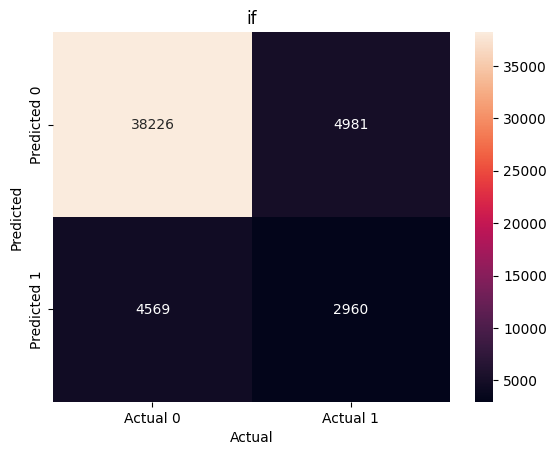

Accuracy:  0.8117707347839798
Precision:  0.39314650019922964
Recall:  0.37274902405238636
F1 Score:  0.3826761473820297
result of the ai method


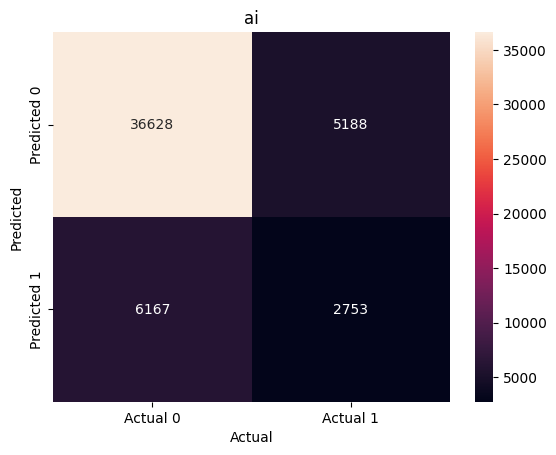

Accuracy:  0.7761944181646169
Precision:  0.3086322869955157
Recall:  0.3466817781135877
F1 Score:  0.32655239902734123


In [28]:
def confusion_matrix(predicted_df,method):
    true_positive = ((predicted_df["prediction"] == 1) & (predicted_df["Diabetes_012"] == 1)).sum()
    true_negative = ((predicted_df["prediction"] == 0) & (predicted_df["Diabetes_012"] == 0)).sum()
    false_positive = ((predicted_df["prediction"] == 1) & (predicted_df["Diabetes_012"] == 0)).sum()
    false_negative = ((predicted_df["prediction"] == 0) & (predicted_df["Diabetes_012"] == 1)).sum()
    matrix = [[true_negative, false_negative], [false_positive, true_positive]]
    
    # Create the heatmap
    sns.heatmap(matrix, annot=True, fmt="d", xticklabels=['Actual 0', 'Actual 1'], yticklabels=['Predicted 0', 'Predicted 1'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(method)
    plt.show()
    
    
def accuracy(predicted_df): 
    return (predicted_df["prediction"] == predicted_df["Diabetes_012"]).sum()/len(predicted_df)
    
def precision(predicted_df):
    true_positive = ((predicted_df["prediction"] == 1) & (predicted_df["Diabetes_012"] == 1)).sum()
    false_positive = ((predicted_df["prediction"] == 1) & (predicted_df["Diabetes_012"] == 0)).sum()
    return true_positive/(true_positive + false_positive)

def recall(predicted_df):
    true_positive = ((predicted_df["prediction"] == 1) & (predicted_df["Diabetes_012"] == 1)).sum()
    false_negative = ((predicted_df["prediction"] == 0) & (predicted_df["Diabetes_012"] == 1)).sum()
    return true_positive/(true_positive + false_negative)

def f1_score(predicted_df):
    prec = precision(predicted_df)
    rec = recall(predicted_df)
    return 2*prec*rec/(prec+rec)



def final_bilan(df,method):
    accuracy_score = accuracy(df)
    precision_score = precision(df)
    recall_score = recall(df)
    f1_score_score = f1_score(df)
    print(f"result of the {method} method")
    confusion_matrix(df,method)
    print("Accuracy: ", accuracy_score)
    print("Precision: ", precision_score)
    print("Recall: ", recall_score)
    print("F1 Score: ", f1_score_score)
    
final_bilan(if_df,"if")
final_bilan(ai_df,"ai")
